<a href="https://colab.research.google.com/github/aayushbokde/DL_study/blob/main/Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [27]:
X,y=make_circles(n_samples=100, noise=0.1,random_state=1)

<Axes: >

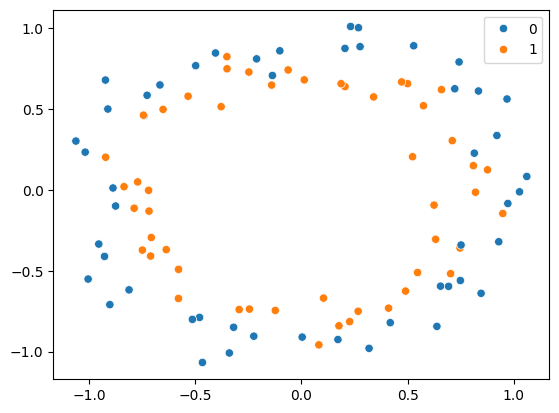

In [28]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=3500, verbose=0)

/tmp/ipython-input-974610335.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


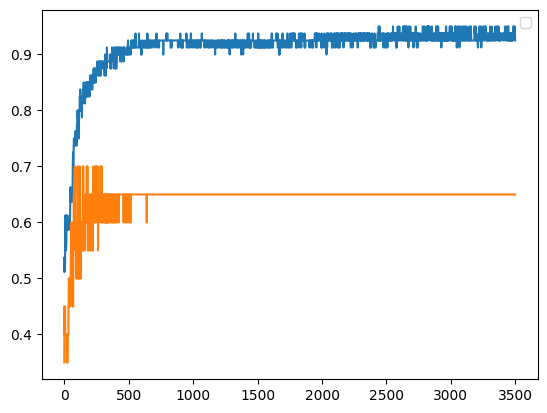

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 958us/step


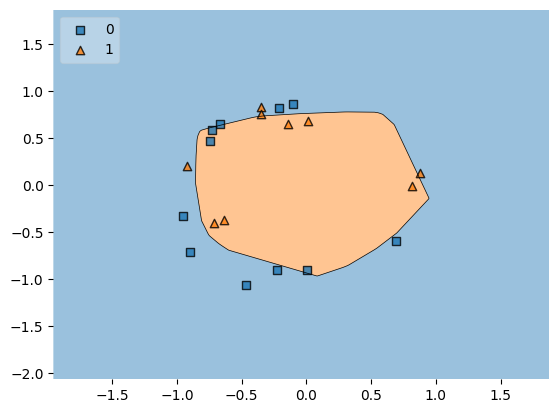

In [34]:
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.show()

In [42]:
# now trying the early stopping
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
callback = EarlyStopping(monitor='val_loss',
                         min_delta=0.00001,
                         patience=50,
                         verbose=1,
                         mode="auto",
                         baseline=None,
                         restore_best_weights=True
                         )

In [50]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=3500, callbacks=[callback])

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5500 - loss: 0.6868 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5461 - loss: 0.6868 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5695 - loss: 0.6855 - val_accuracy: 0.4000 - val_loss: 0.6944
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5609 - loss: 0.6877 - val_accuracy: 0.4500 - val_loss: 0.6958
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5781 - loss: 0.6847 - val_accuracy: 0.4500 - val_loss: 0.6977
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5898 - loss: 0.6840 - val_accuracy: 0.3500 - val_loss: 0.7003
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5609 - loss: 0.6877 - val_accuracy: 0.3500 - val_loss: 0.7018
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6234 - loss: 0.6808 - val_accuracy: 0.3500 -

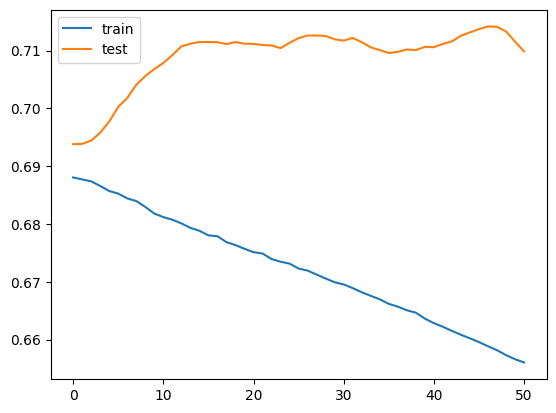

In [52]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 997us/step


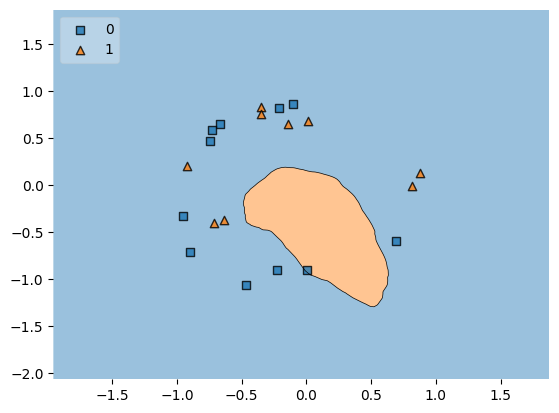

In [53]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()